<a href="https://colab.research.google.com/github/ManalSahafi/master-degree/blob/main/ML/Binary_Classification_Machine_Learning_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read the dataset

In [ ]:
realEstate=pd.read_csv("/content/drive/MyDrive/realEstate_Riyadh.csv", sep=';')
#drop columns not include in our expermanints
realEstate.drop(columns=['id', "latitude", 'longitude'], inplace=True) 
realEstate

,district,area,age,num_bedrooms,num_livings,num_water_cycles,street_width,IsKetchen,IsFurnished,review,onMarket,IsRent,price
0,حي النظيم,225.0,9.0,3,0.0,2,15.0,1.0,0.0,5.00,17,False,20000
1,حي الفيحاء,130.0,12.0,3,1.0,2,30.0,1.0,0.0,4.33,5,True,25000
2,حي الرمال,200.0,NaN,3,1.0,2,25.0,0.0,0.0,4.67,15,True,22000
3,حي العقيق,120.0,0.0,1,1.0,1,34.0,1.0,0.0,4.17,165,False,38000
4,حي التعاون,60.0,9.0,1,1.0,1,39.0,1.0,0.0,4.42,48,False,25000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6757,حي النرجس,180.0,0.0,3,1.0,2,18.0,1.0,0.0,4.31,33,False,60000
6758,حي غبيرة,90.0,25.0,2,1.0,1,5.0,0.0,0.0,4.82,493,False,9800
6759,حي اليرموك,120.0,5.0,3,1.0,2,20.0,1.0,1.0,5.00,62,False,50000
6760,حي النرجس,200.0,1.0,2,2.0,2,15.0,1.0,0.0,4.54,20,False,40000


In [ ]:
#Number of rows and columns in the dataset 
realEstate.shape

(6762, 13)

# Dealing with missing value 

In [ ]:
#First: 
#compute all NaN value in each column
realEstate.isnull().sum()

district              0
area                175
age                 705
num_bedrooms          0
num_livings           2
num_water_cycles      0
street_width        210
IsKetchen            17
IsFurnished          45
review              399
onMarket              0
IsRent                0
price                 0
dtype: int64

In [ ]:
#Second:
#Replacing all NaN values with 0
realEstate.fillna({'review':0}, inplace=True)
realEstate.fillna({'num_livings':0}, inplace=True)
realEstate.fillna({'IsKetchen':0}, inplace=True)
realEstate.fillna({'IsFurnished':0}, inplace=True)

In [ ]:
#Thired:
#Drope all rows has NaN value from dataset
data=realEstate.dropna()

#Finally:
#Examing the changes
data

,district,area,age,num_bedrooms,num_livings,num_water_cycles,street_width,IsKetchen,IsFurnished,review,onMarket,IsRent,price
0,حي النظيم,225.0,9.0,3,0.0,2,15.0,1.0,0.0,5.00,17,False,20000
1,حي الفيحاء,130.0,12.0,3,1.0,2,30.0,1.0,0.0,4.33,5,True,25000
3,حي العقيق,120.0,0.0,1,1.0,1,34.0,1.0,0.0,4.17,165,False,38000
4,حي التعاون,60.0,9.0,1,1.0,1,39.0,1.0,0.0,4.42,48,False,25000
5,حي الياسمين,170.0,3.0,3,1.0,2,35.0,0.0,0.0,4.47,7,True,40000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6757,حي النرجس,180.0,0.0,3,1.0,2,18.0,1.0,0.0,4.31,33,False,60000
6758,حي غبيرة,90.0,25.0,2,1.0,1,5.0,0.0,0.0,4.82,493,False,9800
6759,حي اليرموك,120.0,5.0,3,1.0,2,20.0,1.0,1.0,5.00,62,False,50000
6760,حي النرجس,200.0,1.0,2,2.0,2,15.0,1.0,0.0,4.54,20,False,40000


# Change datatype

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5882 entries, 0 to 6761
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   district          5882 non-null   object 
 1   area              5882 non-null   float64
 2   age               5882 non-null   float64
 3   num_bedrooms      5882 non-null   int64  
 4   num_livings       5882 non-null   float64
 5   num_water_cycles  5882 non-null   int64  
 6   street_width      5882 non-null   float64
 7   IsKetchen         5882 non-null   float64
 8   IsFurnished       5882 non-null   float64
 9   review            5882 non-null   float64
 10  onMarket          5882 non-null   int64  
 11  IsRent            5882 non-null   bool   
 12  price             5882 non-null   int64  
dtypes: bool(1), float64(7), int64(4), object(1)
memory usage: 603.1+ KB


In [ ]:
# convert categorical "district" column to numeric

from sklearn.preprocessing import LabelEncoder
 
le = LabelEncoder()
label = le.fit_transform(data['district'])

data.drop("district", axis=1, inplace=True)
 
# Appending the array label to our dataFrame with new column called 'district'
data["district"] = label 
label

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


array([84, 55, 48, ..., 94, 80, 80])

In [ ]:
# Convert int columns to float datatype

data['price'] = data['price'].astype(float)
data['num_bedrooms'] = data['num_bedrooms'].astype(float)
data['num_water_cycles'] = data['num_water_cycles'].astype(float)
data['IsRent'] = data['IsRent'].astype(float)
data['onMarket'] = data['onMarket'].astype(float)
data['district'] = data['district'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
# printing Dataframe
data

,area,age,num_bedrooms,num_livings,num_water_cycles,street_width,IsKetchen,IsFurnished,review,onMarket,IsRent,price,district
0,225.0,9.0,3.0,0.0,2.0,15.0,1.0,0.0,5.00,17.0,0.0,20000.0,84.0
1,130.0,12.0,3.0,1.0,2.0,30.0,1.0,0.0,4.33,5.0,1.0,25000.0,55.0
3,120.0,0.0,1.0,1.0,1.0,34.0,1.0,0.0,4.17,165.0,0.0,38000.0,48.0
4,60.0,9.0,1.0,1.0,1.0,39.0,1.0,0.0,4.42,48.0,0.0,25000.0,6.0
5,170.0,3.0,3.0,1.0,2.0,35.0,0.0,0.0,4.47,7.0,1.0,40000.0,93.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6757,180.0,0.0,3.0,1.0,2.0,18.0,1.0,0.0,4.31,33.0,0.0,60000.0,80.0
6758,90.0,25.0,2.0,1.0,1.0,5.0,0.0,0.0,4.82,493.0,0.0,9800.0,119.0
6759,120.0,5.0,3.0,1.0,2.0,20.0,1.0,1.0,5.00,62.0,0.0,50000.0,94.0
6760,200.0,1.0,2.0,2.0,2.0,15.0,1.0,0.0,4.54,20.0,0.0,40000.0,80.0


#Exploratory Data Analysis (EDA)


In [ ]:
data.groupby('IsRent').describe()

area                                                        \
         count         mean            std  min    25%    50%    75%   
IsRent                                                                 
0.0     3282.0  3536.899147  193946.591781  0.0   80.0  140.0  175.0   
1.0     2600.0   179.842308     441.690180  1.0  100.0  150.0  190.0   

                       age            ...    price           district  \
               max   count      mean  ...      75%       max    count   
IsRent                                ...                               
0.0     11111100.0  3282.0  2.932968  ...  65000.0  360000.0   3282.0   
1.0        18000.0  2600.0  2.651154  ...  50000.0  450000.0   2600.0   

                                                            
             mean        std  min   25%   50%   75%    max  
IsRent                                                      
0.0     66.460390  30.964213  0.0  44.0  69.0  91.0  124.0  
1.0     66.995385  32.695783  0.0  44.0  74.0  93.0  125.0  

[2 rows x 96 columns]

In [ ]:
print(data['IsRent'].value_counts())

0.0    3282
1.0    2600
Name: IsRent, dtype: int64


In [ ]:
data.columns

Index(['area', 'age', 'num_bedrooms', 'num_livings', 'num_water_cycles',
       'street_width', 'IsKetchen', 'IsFurnished', 'review', 'onMarket',
       'IsRent', 'price', 'district'],
      dtype='object')

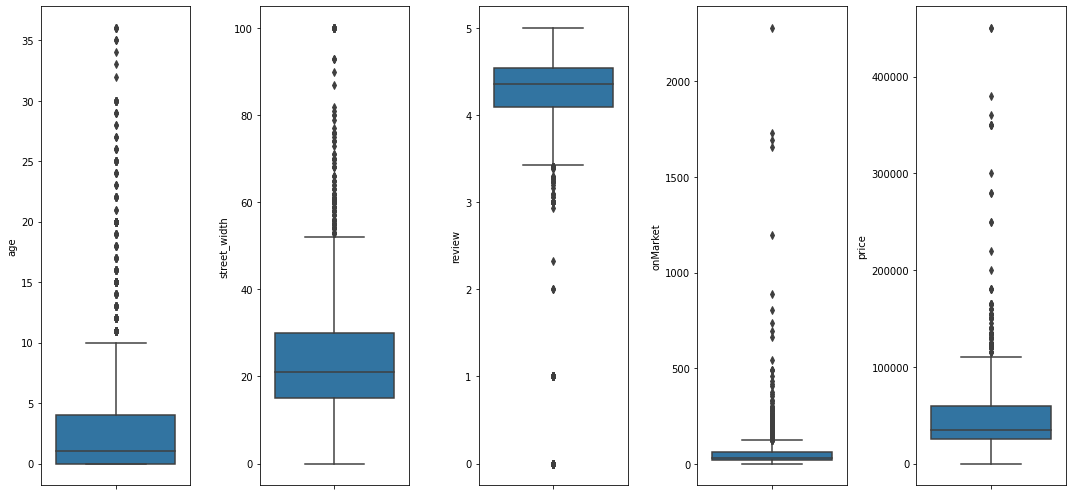

In [ ]:
import seaborn as sns

#Discover outliers

a = [ 'age',  'street_width',  'review', 'onMarket', 'price']
i = 1
plt.figure(figsize=(15,7))
for b in a:
    plt.subplot(1,5,i)
    sns.boxplot(y = b,data= data)
    i+=1
    plt.tight_layout()

<Figure size 7200x7200 with 0 Axes>

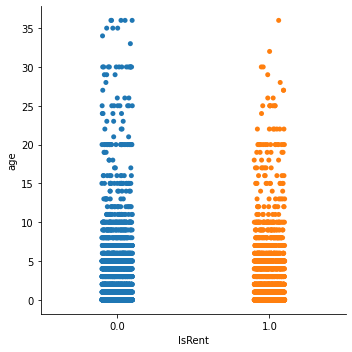

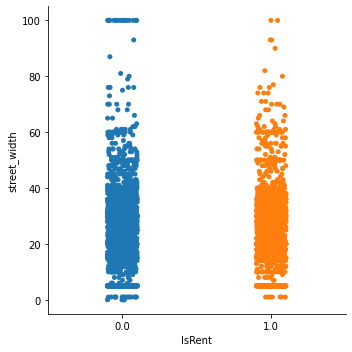

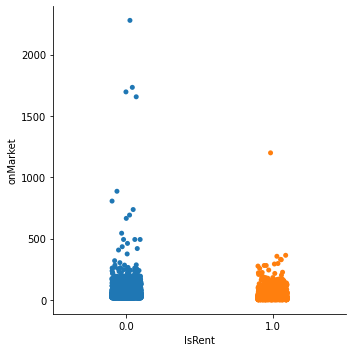

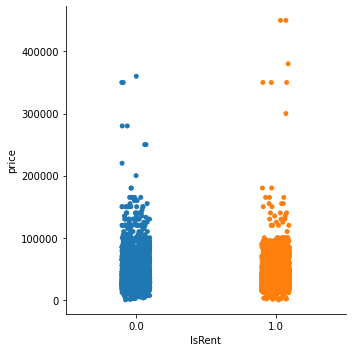

In [ ]:
a = ['age', 'street_width', 'onMarket', 'price']
i = 1
plt.figure(figsize=(100,100))
for b in a:
    sns.catplot(x = 'IsRent' , y = b ,data=data)

## **Feature Engineering**


# Remove outliers using IQR

In [ ]:
# Removing the outliers
print("Shape of data Before outlier removal is: ", data.shape)

def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1 
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in data[col] if (  (x > lower_range) & (x < upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]
    return filtered_data



      
data1= removeOutliers(data, data.columns[0])
data2= removeOutliers(data1, data.columns[1])
data3= removeOutliers(data2, data.columns[5])
data4= removeOutliers(data3, data.columns[9])
dataset= removeOutliers(data4, data.columns[11])

print("Shape of data After outlier removal is: ", dataset.shape)

Shape of data Before outlier removal is:  (5882, 13)
Shape of data After outlier removal is:  (4642, 13)


<Figure size 7200x7200 with 0 Axes>

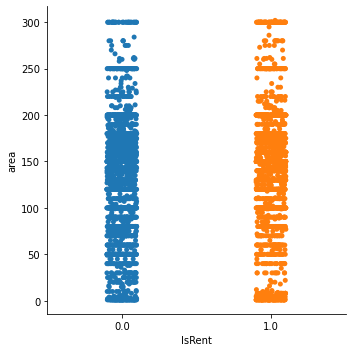

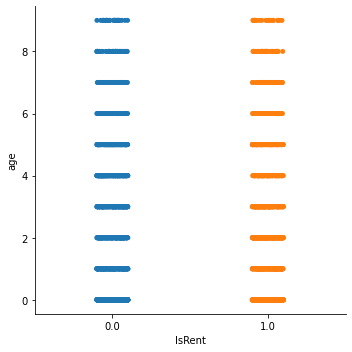

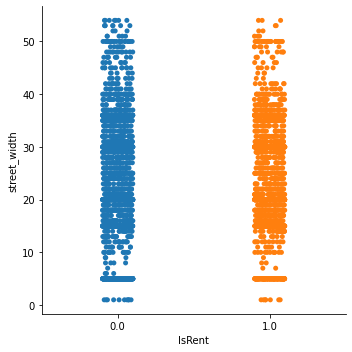

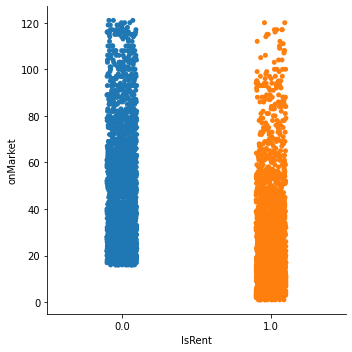

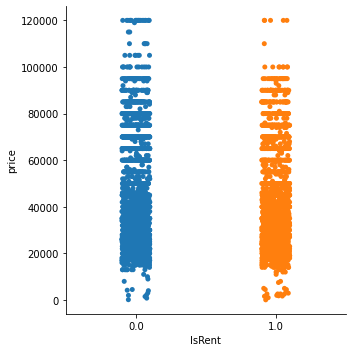

In [ ]:
a = ['area', 'age', 'street_width', 'onMarket', 'price']
i = 1
plt.figure(figsize=(100,100))
for b in a:
    sns.catplot(x = 'IsRent' , y = b ,data=dataset)

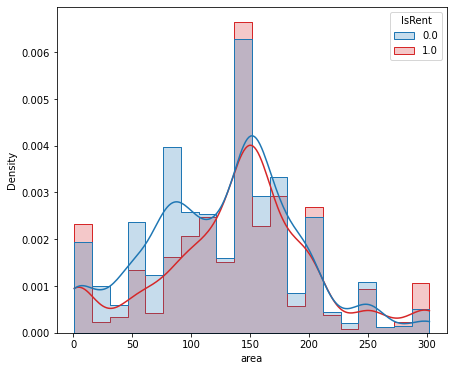

In [ ]:
plt.figure(figsize=(7,6))
sns.histplot(data=dataset,x=dataset.columns[0],hue='IsRent',stat='density',bins=20,kde=True,
             palette=[sns.color_palette()[0],sns.color_palette()[3]],element='step')

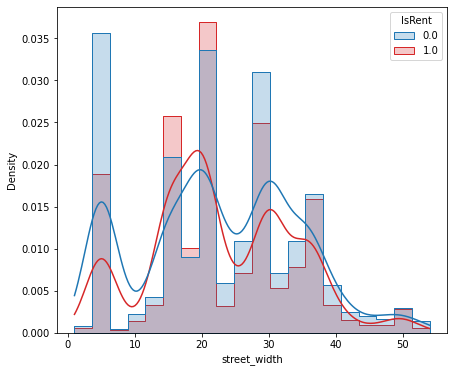

In [ ]:
plt.figure(figsize=(7,6))
sns.histplot(data=dataset,x=dataset.columns[5],hue='IsRent',stat='density',bins=20,kde=True,
             palette=[sns.color_palette()[0],sns.color_palette()[3]],element='step')

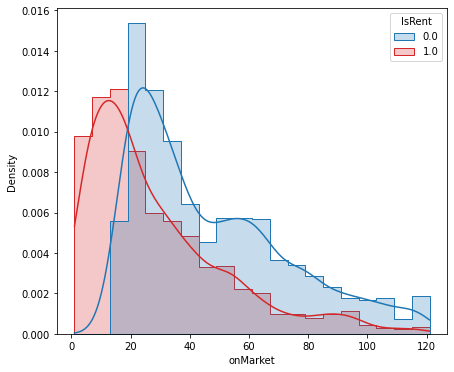

In [ ]:
plt.figure(figsize=(7,6))
sns.histplot(data=dataset,x=dataset.columns[9],hue='IsRent',stat='density',bins=20,kde=True,
             palette=[sns.color_palette()[0],sns.color_palette()[3]],element='step')

# **Normalization Dataset using MinMaxScaler**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(dataset)

df = pd.DataFrame(scaled_data, columns= dataset.columns)
features_data= df.iloc[:,[0,1,2,3,4,5,6,7,8,9,11,12,10]]
features_data

,area,age,num_bedrooms,num_livings,num_water_cycles,street_width,IsKetchen,IsFurnished,review,onMarket,price,district,IsRent
0,0.744186,1.000000,0.333333,0.0,0.25,0.264151,1.0,0.0,1.000,0.133333,0.166146,0.672,0.0
1,0.196013,1.000000,0.000000,0.2,0.00,0.716981,1.0,0.0,0.884,0.391667,0.207838,0.048,0.0
2,0.561462,0.333333,0.333333,0.2,0.25,0.641509,0.0,0.0,0.894,0.050000,0.332916,0.744,1.0
3,0.661130,0.555556,0.333333,0.2,0.25,0.320755,0.0,0.0,0.876,0.233333,0.232854,0.616,0.0
4,0.528239,0.222222,0.500000,0.2,0.25,0.490566,1.0,0.0,0.958,0.141667,0.332916,0.640,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4637,0.578073,0.000000,0.333333,0.2,0.25,0.547170,1.0,0.0,0.748,0.316667,0.624765,0.464,1.0
4638,0.461794,0.555556,0.333333,0.2,0.25,0.358491,0.0,0.0,0.858,0.483333,0.216177,0.752,1.0
4639,0.594684,0.000000,0.333333,0.2,0.25,0.320755,1.0,0.0,0.862,0.266667,0.499687,0.640,0.0
4640,0.395349,0.555556,0.333333,0.2,0.25,0.358491,1.0,1.0,1.000,0.508333,0.416302,0.752,0.0


## **Feature Selection**

# Split to Train and Test dataset

In [ ]:
features_data.insert(0, 'Ones', 1)
cols = features_data.shape[1]
X = features_data.iloc[:, 0:cols-1] 
y = features_data.iloc[:, cols-1: cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=45, train_size = 0.70)

In [ ]:
X_train.shape, X_test.shape

((3249, 13), (1393, 13))

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.6)
print( 'correlation length =:' ,len(set(corr_features)) , '\n', 'correlation column name:',corr_features )

correlation length =: 2 
 correlation column name: {'num_water_cycles', 'price'}


In [ ]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,Ones,area,age,num_bedrooms,num_livings,street_width,IsKetchen,IsFurnished,review,onMarket,district
2419,1,0.461794,0.000000,0.166667,0.2,0.264151,1.0,0.0,0.870,0.066667,0.640
2774,1,0.000000,0.777778,0.166667,0.2,0.358491,1.0,0.0,0.950,0.200000,0.640
3972,1,0.661130,0.000000,0.333333,0.4,0.660377,1.0,0.0,0.970,0.258333,0.640
3878,1,0.495017,0.000000,0.333333,0.6,0.509434,1.0,0.0,0.000,0.416667,0.712
470,1,0.661130,0.000000,0.166667,0.4,0.358491,1.0,0.0,0.938,0.158333,0.640
...,...,...,...,...,...,...,...,...,...,...,...
2324,1,0.196013,0.555556,0.000000,0.2,0.301887,1.0,0.0,0.870,0.041667,0.024
3332,1,0.162791,0.666667,0.000000,0.2,0.075472,1.0,0.0,0.870,0.425000,0.512
730,1,0.827243,0.000000,0.666667,0.4,0.660377,1.0,0.0,0.858,0.141667,0.352
1217,1,0.262458,0.000000,0.000000,0.0,0.358491,1.0,0.0,0.844,0.041667,0.744


# **Dataset to Matrix**

In [ ]:
#Training
X = np.matrix(X_train.values)  
y = np.matrix(y_train.values)  
theta = theta = np.matrix(np.array([0,0,0,0,0,0,0,0,0,0,0,0,0]))

# Testing 
X_of_test = np.matrix(X_test.values)
y_of_test = np.matrix(y_test.values)

##**A investigate: Regularized My Logistic Regression model**


In [ ]:
def sigmoid(z):  
    return 1 / (1 + np.exp(-z))

def hypothesis(X,theta):
    z = np.dot(X,theta.T)
    hx = sigmoid(z)
    return hx

def costfunction(theta,X,y, lamb):
    m = len(X)
    hx = hypothesis(X,theta)
    part1 = np.dot(-y.T, np.log(hx))
    part2 = np.dot((1 - y).T, np.log(1 - hx))

    reg_term = (lamb / (2 * m)) * np.sum(np.square(theta[:1]))
    cost = (np.sum(part1 - part2) / m) + reg_term
    return cost

def gradient(X,y,theta):
    m,n = X.shape
    hx =  hypothesis(X,theta)
    error= hx - y
    return error

def gradientReg_de(X, y, theta, alpha, iters, lamb):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1]) 
    cost = np.zeros(iters)
 
    for i in range(iters):
        error = gradient(X,y,theta)
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = (1-(alpha/lamb))*theta[0,j] - ((alpha / len(X)) * np.sum(term)) #Modyfi with Regularization Parameter
        
        theta = temp #new thetas
        cost[i] = costfunction(theta,X,y, lamb) #error at each itereation
    return theta , cost

def predict(X, thetas, threshold=0.5): 
    y_h = hypothesis(X,thetas)
    result = np.array(list(map(lambda x: 1 if x>threshold else 0, y_h)))
    return result
     

In [ ]:
iters = 10000
lr = 0.1
lambda_cof = 60

#Fitting
optimth, minicost= gradientReg_de(X, y, theta, lr, iters, lambda_cof)

#Predicting
y_p = predict(X_of_test , optimth)

s = f1_score(y_of_test, y_p )

print('\n')
print("Accuracy of my best model:" , s)




Accuracy of my best model: 0.640069384215091


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


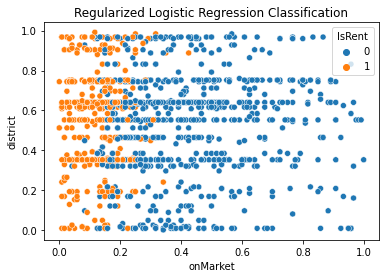

In [ ]:
X_test['IsRent'] = y_p
plt.figure(figsize=(6,4))
sns.scatterplot( X_test['onMarket'], X_test['district'], hue=X_test['IsRent'], )
plt.title('Regularized Logistic Regression Classification')
plt.show()

# **B investigate :  logistic regression sklearn model**

In [ ]:
from sklearn.linear_model import LogisticRegression

iters = 10000

#Fitting
clf = LogisticRegression( max_iter=iters).fit(X_train, y_train)

#Predicting
y_p_clf = clf.predict(X_of_test)
s_clf = f1_score(y_of_test, y_p_clf )

print('\n')
print("Accuracy of logistic regression sklearn model:", s_clf)
print('\n')




Accuracy of logistic regression sklearn model: 0.6476923076923078




/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


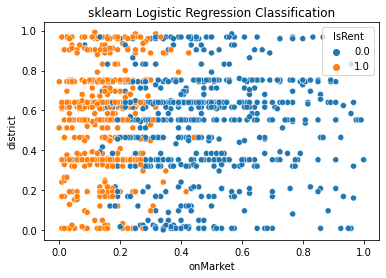

In [ ]:
X_test['IsRent'] = y_p_clf
plt.figure(figsize=(6,4))
sns.scatterplot( X_test['onMarket'], X_test['district'], hue=X_test['IsRent'], )
plt.title('sklearn Logistic Regression Classification')
plt.show()

# **Investigate C : My Linear Perceptron model**


In [ ]:
def hypoth_per(x):
    return np.where(x >= 0, 1, 0)


def percepton(X, y, theta, lr, iters):
    # init parameters
    bias = 0
    y_p = np.array([1 if i > 0 else 0 for i in y])
    weights = np.matrix(np.zeros(theta.shape))
    cost = np.zeros(iters)
    for i in range(iters):
        for idx, x_i in enumerate(X):
            out = np.dot(x_i,weights.T ) + bias
            y_p = hypoth_per(out)
            update = lr * (y[idx] - y_p)
            weights += update * x_i
            bias += update
        theta = weights #new thetas
        
    return theta 

def predict_percepton(X, weights, bias): 
    y_h = np.dot(X, weights.T) + bias
    result = hypoth_per(y_h)
    return result


In [ ]:
iters = 10000
lr = 0.1

#Fitting
optimth_per = percepton(X, y, theta, lr, iters)

#Predicting
y_p_per = predict_percepton(X_of_test , optimth_per, 0)

s_per = f1_score(y_of_test, y_p_per)
print('\n')
print("Accuracy of Linear Perceptron model:", s_per)




Accuracy of Linear Perceptron model: 0.360655737704918


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


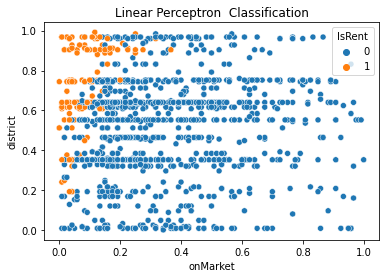

In [ ]:
X_test['IsRent'] = y_p_per
plt.figure(figsize=(6, 4))
sns.scatterplot( X_test['onMarket'], X_test['district'], hue=X_test['IsRent'], )
plt.title('Linear Perceptron  Classification')
plt.show()

# **Investigate  D: My Naïve Bayes model**

In [ ]:
def fit_train( X, y):
    n_samples, n_features = X.shape
    classes = np.unique(y)
    n_classes = len(classes)
    means = np.zeros((n_classes, n_features), dtype=np.float64)
    var = np.zeros((n_classes, n_features), dtype=np.float64)
    priors =  np.zeros(n_classes, dtype=np.float64) 

    for i, c in enumerate(classes):
        X_for_class_c = X[y==c]
        means[i, :] = X_for_class_c.mean(axis=0)
        var[i, :] = X_for_class_c.var(axis=0)
        priors[i] = X_for_class_c.shape[0] / float(n_samples) #prior probability P(y) from train dataset
    return classes, means, var , priors

# calculate posterior probability for test dataset
def calculate_likelihood(means, var, class_idx, x):
    mean = means[class_idx]
    var = var[class_idx]
    num = np.exp(- (x - mean)**2 / (2 * var))
    denom = np.sqrt(2 * np.pi * var)
    return num / denom

def NaiveBayes(X, classes, means, var , _priors):
    y_pred = [classify_sample(classes, x, _priors, means , var) for x in X]
    return np.array(y_pred)

def classify_sample(classes, x, _priors, mean , var):
    posteriors = []
    for i, c in enumerate(classes):
        prior = np.log(_priors[i])
        posterior = np.sum(np.log(calculate_likelihood(means, var, i, x)))
        posterior = prior + posterior
        posteriors.append(posterior)
    return classes[np.argmax(posteriors)]
    

In [ ]:
classes, means, var , priors =fit_train(X_train, y_train)
# Testing 
X_t = np.array(X_test.values)
y_t = np.array(y_test.values)

y_p_nb = NaiveBayes(X_t,classes, means, var , priors)

snb= f1_score(y_t, y_p_nb )
print('\n')
print("Accuracy of Naive Bayes  model:", s)





Accuracy of Naive Bayes  model: 0.640069384215091


# **Investigate  E: SVM classifier sklearn model**

In [ ]:
from sklearn.svm import SVC
iters = 10000
svc=SVC(max_iter = iters) 
svc.fit(X,y)
y_p_svc=svc.predict(X_of_test)

s = f1_score(y_of_test, y_p_svc )
print('\n')
print("Accuracy of SVM model:", s)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,




Accuracy of SVM model: 0.643265306122449


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


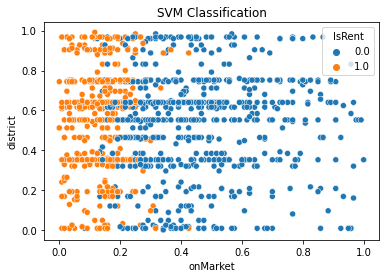

In [ ]:
X_test['IsRent'] = y_p_svc
plt.figure(figsize=(6, 4))
sns.scatterplot( X_test['onMarket'], X_test['district'], hue=X_test['IsRent'], )
plt.title('SVM Classification')
plt.show()

# **Investigate F : My Gaussian Discriminant Analysis model**




In [ ]:
from scipy.stats import multivariate_normal

def fit(x_train, y_train):
    X = x_train
    m = y_train.shape[0] 
    x_train = X.reshape(m, -1)
    input_feature = X.shape[1]
    class_label = len(np.unique(y_train))

    mu = np.zeros((class_label, input_feature))
    sigma = np.zeros((class_label, input_feature))
    phi = np.zeros(class_label)

    for label in range(class_label):
        indices    = (y_train == label)
        phi[label] = float(np.sum(indices)) / m
        mu[label, :]  =  indices.mean(axis=0)   
        sigma[label, :] = np.cov(indices, rowvar=0)
    return phi, mu, sigma


def predict_GDA(x_tests, phi, mu, sigma):
    x_tests = x_tests.reshape(x_tests.shape[0], -1)
    class_label = mu.shape[0] 
    scores = np.zeros((x_tests.shape[0], class_label)) 

    for label in range(class_label):
        normal_distribution_prob = multivariate_normal(mean=mu[label], cov=sigma[label])
        for i, x_test in enumerate(x_tests):
            scores[i, label] = np.log(phi[label]) + np.sum(np.log(normal_distribution_prob.pdf(x_test)))
    predictions = np.argmax(scores, axis=1)
    return predictions


In [ ]:
#Training
X = np.array(X_train.values)  
y = np.array(y_train.values) 

# Testing 
X_of_test = np.array(X_test.values)
y_of_test = np.array(y_test.values)


#Fitting
phi, mu, sigma = fit(X, y)

#Predicting
y_predict = predict_GDA(X_of_test, phi, mu, sigma)

s = f1_score(y_of_test, y_predict)
print('\n')
print("Accuracy of GDA model:", s)



Accuracy of GDA model: 0.514796971782519


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


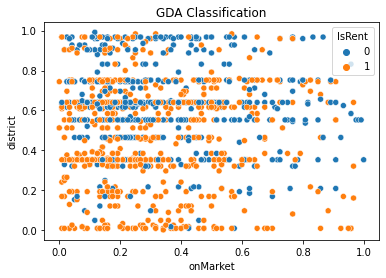

In [ ]:
X_test['IsRent'] = y_predict
plt.figure(figsize=(6,4))
sns.scatterplot( X_test['onMarket'], X_test['district'], hue=X_test['IsRent'], )
plt.title('GDA Classification')
plt.show()